Q2: Are the people who hear the siren younger than the people who do not hear it?

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Reading and cleaning the data

In [4]:
data = pd.read_csv('siren_data_train.csv')
data = data.dropna()

# Visualize the data
We begin with a simple plot so we can inspect the data


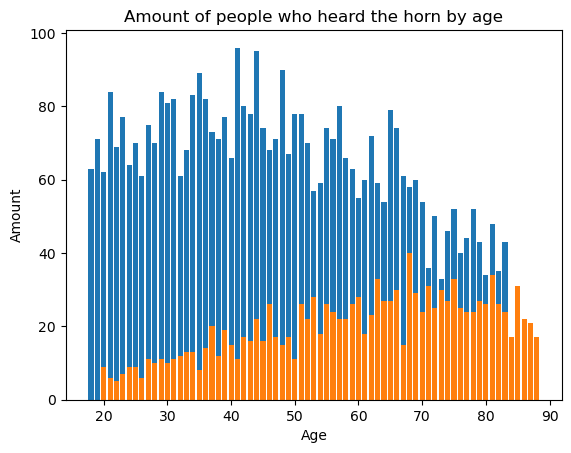

In [10]:
#For every age see how many who heard
hear_by_age = data[data['heard'] == 1].groupby('age').size()

not_hear_by_age = data[data['heard'] == 0].groupby('age').size()

plt.bar(hear_by_age.index, hear_by_age.values, label='Heard')
plt.bar(not_hear_by_age.index, not_hear_by_age.values, label='Not heard')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.title('Amount of people who heard the horn by age')


plt.show()

As we can see, the amount of people who heard the horn seems to decrease with age. To find out if there is a relationship, we can fit a logistic regression curve to the data. 

Spearman correlation:  -0.2835979188896769


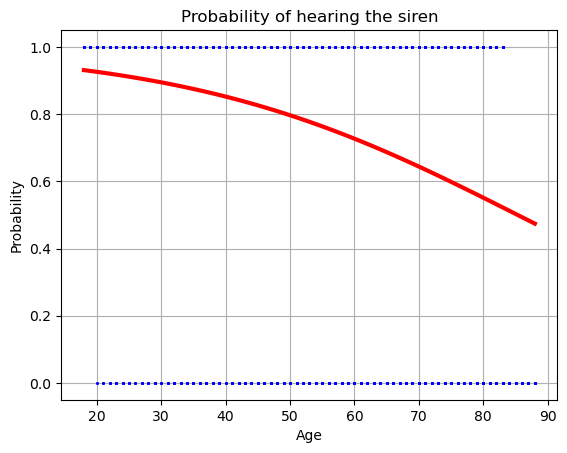

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = data['age'].values.reshape(-1,1)
y = data['heard'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

spearman = data['age'].corr(data["heard"],method='spearman')
print("Spearman correlation: ", spearman)

plt.scatter(X_test, y_test, zorder=20, color='blue', s=1)

x_sequence = np.linspace(X.min(), X.max(), 100).reshape(-1,1)

plt.plot(x_sequence, logreg.predict_proba(x_sequence)[:,1], color='red', linewidth=3)
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Probability of hearing the siren')
plt.grid(True)
plt.show()


From the logistic regression curve, we can see that the probability of hearing the horn decreases by age. In addition, the spearman correlation is -0.29 which suggests a moderate negative correlation. As age increases, the probability of hearing the siren tends to decrease although the relationship isn't perfect. 
\
\
Answer: Yes, the people who hear the siren tend to be younger. 